In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [21]:
raw = pd.read_csv('r3000_format.csv', low_memory=False)

raw = raw.iloc[0:329,:]

N_WEEKS, N_ASSETS = raw.shape

dates = raw['Date']
d_begin = dates[0]
d_end = dates[328]
print(d_begin)

20101105.0


In [13]:
def transform(tgt_dates):
    flag_lst = [1] * len(dates)
    ti, cd = 0, 0
    while ti < len(dates) - 1:
        t = dates[ti]
        t_next = dates[ti + 1]
        if not tgt_dates:
            return flag_lst
    
        while tgt_dates[0] < t:
            tgt_dates.pop(0)
            if not tgt_dates:
                return flag_lst
    
        if not tgt_dates:
            return flag_lst
            
        if tgt_dates[0] < t_next:
            # print(tgt_date[0], t_next)
            flag = 0
            cd = 26
        else:
            cd -= 1
            cd = max(cd, 0)
            # print(cd)
            if cd == 0:
                flag = 1
        flag_lst[ti + 1] = flag
        ti += 1
    return flag_lst

In [69]:
flag_lst = []
for ni in range(1, N_ASSETS):
    if ni % 500 == 0:
        print(ni)
    tgt_date = raw.iloc[:,ni].copy()
    tgt_date = tgt_date.dropna()
    tgt_date = tgt_date[::-1].tolist()
    tgt_date.sort()
    if tgt_date and type(tgt_date[0]) == str:
        tgt_date = [float(d) for d in tgt_date]
    flag_lst.append(transform(tgt_date))

500
1000
1500
2000
2500
3000
3500
4000
4500
5000


In [74]:
tickers = raw.columns
flag_lst_2 = [raw['Date'].tolist()] + flag_lst

res = dict(zip(tickers, flag_lst_2))

In [75]:
len(flag_lst_2)

5236

In [82]:
res = pd.DataFrame(res, index=res['Date'])

In [84]:
res.to_csv('comp_status.csv')

In [94]:
res = res.drop('Date', axis=1)

In [97]:
pool = [sum(res.iloc[k,:]) for k in range(N_WEEKS)]

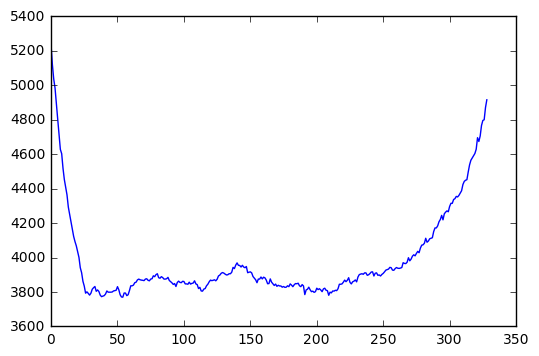

In [100]:
import matplotlib.pyplot as plt
plt.plot(pool)
plt.show()